# Illustrate and debug scaling issues

I'll also try the updated code from Samuel:

https://github.com/lneuhaus/pyrpl/issues/396

We also have a gitlab issue for the scaling problems:

https://github.com/lneuhaus/pyrpl/issues/398

Of course, I can always fudge in a rescaling factor myself. But it would be good to figure out where it comes from. 

In [13]:
from pyrpl import Pyrpl
from time import sleep
import matplotlib.pyplot as plt
import numpy as np

In [14]:
HOSTNAME = "rp-f06897.local"

p = Pyrpl(hostname=HOSTNAME, config='test',gui=False)

r = p.rp
s = r.scope

INFO:pyrpl:All your PyRPL settings will be saved to the config file
    /Users/gsteele/pyrpl_user_dir/config/test.yml
If you would like to restart PyRPL with these settings, type "pyrpl.exe test" in a windows terminal or 
    from pyrpl import Pyrpl
    p = Pyrpl('test')
in a python terminal.
ERROR:pyrpl.redpitaya_client:Error occured in reading attempt 0. Reconnecting at addr 0x40100014 to _reads value 1 by client 6
INFO:pyrpl.redpitaya:Successfully connected to Redpitaya with hostname rp-f06897.local.


Max:  0.9161376953125
Min:  -0.916015625
PTP:  1.8321533203125
Offset:  0.016558006405830383


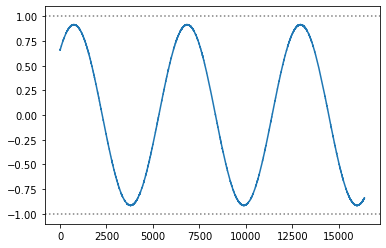

In [15]:
# I've got an SMA cable looping the output of generator 1 into the input of digitizer 1

asg = r.asg0
asg.output_direct = 'out1'
a = 1
asg.setup(waveform='sin', frequency=20, amplitude=a, offset=0, trigger_source='immediately')

s.input1 = 'in1'
s.input2 = 'in2'
s.decimation = 1024 # or s.duration =0.01
s.average = True
s.trigger_source = 'immediately'

s._start_acquisition()
sleep(s.duration)
c1,_= s._get_curve()

print("Max: ", np.max(c1))
print("Min: ", np.min(c1))
print("PTP: ", np.max(c1)-np.min(c1))
print("Offset: ", np.average(c1))

plt.plot(c1)
plt.ylim(-1.1,1.1)
plt.axhline(-1,ls=':', c='grey')
plt.axhline(1,ls=':', c='grey')
plt.show()